In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [5]:
#Loading the datasets
customers = pd.read_csv('/content/sample_data/Customers.csv')
transactions = pd.read_csv('/content/sample_data/Transactions.csv')

#Merging data
transactions = transactions.merge(customers, on='CustomerID', how='left')

In [6]:
#Feature Engineering
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price': 'mean'
}).reset_index()

customer_features.columns = ['CustomerID', 'TotalSpent', 'NumTransactions', 'AvgTransactionValue']

#Adding demographic features
customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

#One-hot encode categorical features
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

#Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

# **Clustering Algorithms**

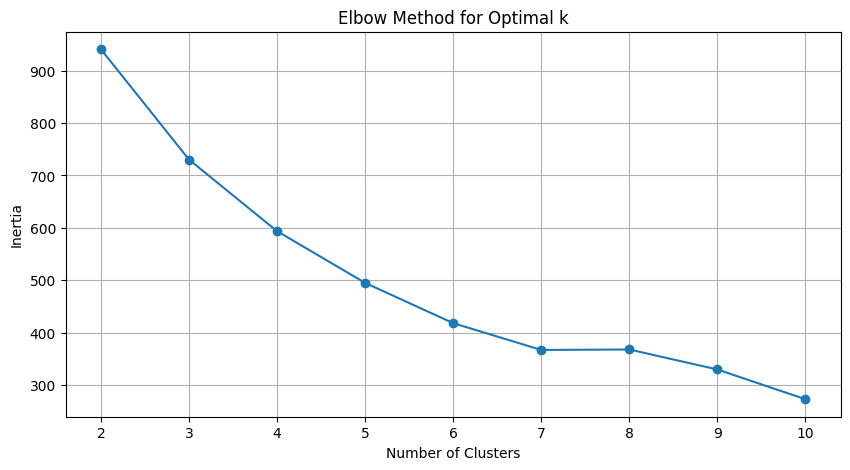

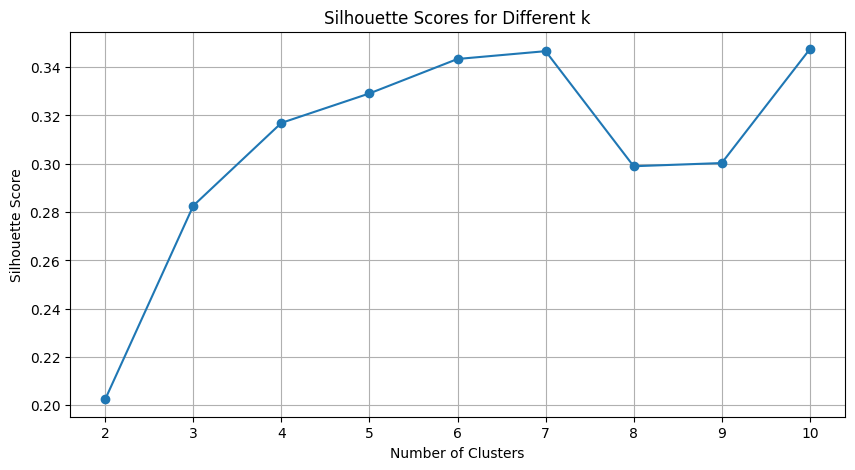

In [13]:
#Determining the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

#Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

#Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Number of clusters formed: 10
Davies-Bouldin Index: 0.9481181696460924


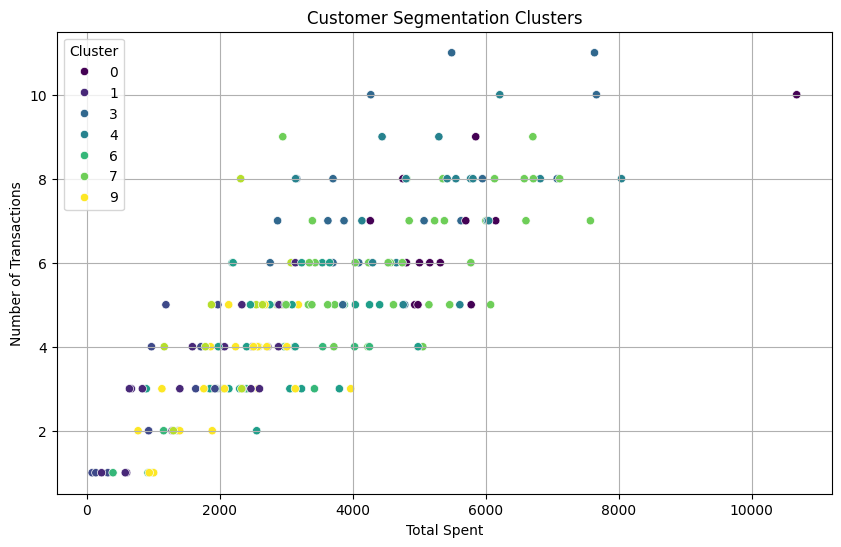

In [14]:
#KMeans clustering
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(features_scaled)

#Calculating DB Index
db_index = davies_bouldin_score(features_scaled, customer_features['Cluster'])

#Print results
print(f'Number of clusters formed: {optimal_clusters}')
print(f'Davies-Bouldin Index: {db_index}')

#Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='TotalSpent', y='NumTransactions', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.grid()
plt.show()